{/* cspell:ignore Gott würfelt nicht outcoming Rihanna Rihanna's Marshman */}

# The Nature of Quantum States: Hidden Variables vs Bell's Inequality

For this Qiskit in Classrooms module, students must have a working python environment with the following packages installed:
- qiskit v $\geq$ 1.3
- qiskit_ibm_runtime v $\geq$ 0.29.0
- qiskit-aer v $\geq$ 15.0
- qiskit.visualization

To set up and install the packages above, see the guidance on IBM Quantum's [Documentation page](https://docs.quantum.ibm.com/guides/install-qiskit).
In order to run jobs on real quantum computers, students will need to set up an account with IBM Quantum. This can be done by following the steps outlined on [Documentation here](https://docs.quantum.ibm.com/guides/setup-channel).

## The Problem

In many calculations throughout quantum mechanics, you start with a known state of a system, and that state is typically known through a measurement. Today we want to answer the question, “What can you say about a particle's state prior to any measurement?” An obvious corollary is, “How can we know, if we're not allowed to measure?”

This question dates back to the early days of quantum mechanics. Pioneers in the field fell into factions with Einstein and many others saying that a particle is simply in some unknown state prior to measurement.  Others, notably Max Born, and later Niels Bohr made a more radical claim, saying the state of a particle was truly undetermined by nature prior to measurement, not merely unknown to humans. Measurement then probabilistically collapses the particle into a definite state. Einstein, dissatisfied with this explanation, famously quipped at this, "Gott würfelt nicht," which roughly translates into "God does not play dice."

For decades after this disagreement emerged, many thought it might never be answered, or that it was a matter of perspective. Then, in 1964, John Bell, a physicist from Northern Ireland, wrote a paper in which he explored the statistics of certain experiments that could answer this question definitively. He showed that in a particular test, one arrives at one set of statistics from defined (but unknown) quantum states, and a different set of statistics from quantum states undetermined by nature.

At that time of Bell's paper, experimental tests of the statistics involved were inaccessible to all but researchers at the very forefront of physics. But today, IBM Quantum has made it possible for students all over the world to use real quantum devices, remotely over the cloud, and for free, to explore the nature of quantum states. This is what you will do today.

## Setup of the Thought Experiment: Entanglement of Spin

There are processes in which a particle with no spin decays into two particles that each have spin. Since spin is a kind of angular momentum, the law of conservation of angular momentum would suggest that the two outcoming particles must have spins exactly anti-aligned. Indeed this is experimentally observed.

An example: a neutral pi meson sometimes decays into a positron and an electron:
$$\pi^0\rightarrow e^+ + e^-$$
Don’t worry if you don’t know what those particles are, and don't worry if you know them so well that you know this decay type is relatively unlikely. Just know that if one of the outcoming particles is spin up, the other must be spin down, and vice versa. Of course, there is nothing special about "up" and "down"; the same antialignment is observed if measurements are made along what we often call $x$ or $y$. This decay is a compelling context for us to consider, because we can sidestep questions about what measurements took place in the past; the positron and electron didn't even exist until the moment of decay.

We can let $\pi^0$ mesons decay and watch the deflection of the outcoming particles under the influence of an inhomogeneous magnetic field. An inhomogeneous field used to deflect spins is often called a Stern Gerlach device, after the researchers who first used it to (accidentally) gather evidence of the existence of quantum mechanical spin. Note that the story here is more complicated than the original experiment since the electron and positron are also charged (unlike the silver atoms in the Stern Gerlach experiment). But we know how charged particles move in a magnetic field, and we can subtract out that effect. In what follows, we will assume the deflections used in our calculations are due to the spin of the particles and not the charge. Consequently, for our purposes it doesn't matter which observer gets the positron and which gets the electron. The experimental setup is something like this:

![A diagram of the setup of an EPR experiment. A source sends out one particle to the left and one to the right. They each pass through a Stern-Gerlach device, an inhomogeneous magnetic field and measuring screen.](/learning/images/courses/qiskit-in-classrooms-quantum-mechanics/bells-inequality-with-qiskit/epr-pic.avif)

As the meson decays, an electron is kicked out in one direction, and a positron in the other. Each of these two particles will travel through an inhomogeneous magnetic field, causing it to be deflected either in the direction of the magnetic field, or opposite the magnetic field.

If we have a source of many mesons, we can collect statistics on this. If an observer on the left and one on the right (call them Lucas and Rihanna, respectively) always measure along the same axis, these statistics will not be very interesting: every time one measures up, the other measures down; every time one measures into the page, the other will measure out of the page, and so on. However, if the players are free to measure the spin along any direction they like, we may find something more interesting.

The experiment described above, in which particles fly off with spin angular momentum that is measured by two observers was initially proposed by Einstein, Podolsky, and Rosen (EPR) in [this paper](https://journals.aps.org/pr/pdf/10.1103/PhysRev.47.777)., and this is sometimes referred to as an "EPR experiment".

## Our Options

Let us restate the two historical viewpoints, for clarity:

__Option 1__ (Einstein): The two spins (the electron and positron) are determined, in the sense that the outcome of any measurement along any axis is pre-determined by nature, even if we don't know what it is. One might think of this as the spins having some real, well-defined orientation in space, which is not known to us, but which exists. Or one might think of this as a set of information or instructions that determine outcomes of measurements along $x$, $y$, $z$, or anything in between. Measuring the spin of the positron (say along z) forces it to orient and align in the z or -z direction. This has no causal influence on the electron spin, although we know the electron spin started out opposite the positron spin, so if the positron spin is measured to be along +z, the electron spin is measured along -z. Other than the initial condition of instructions that conserve angular momentum (the spins being anti-aligned), there is no connection between the two spins. This option is sometimes called "hidden variables", as in: the projections along different axes are determined, but are hidden from us.

__Option 2__ (Born): The spins are both undetermined in their initial states… not merely unknown, but ill-defined physically, with no definite orientation or instructions on experimental outcomes, until they are measured. Measuring the positron spin “collapses” the space of all possibilities down to a single determined state, either along the +z or -z axes. This measurement of the positron forces the electron spin to also collapse into a well-defined projection along z, exactly opposite the positron’s. This effect occurs spread out across the space between the positron and electron. This has been called "spooky action at a distance”, but one might less-dramatically call it "non-local physics".

### Check-in question:

It would be great to distinguish between the Einstein and Born options experimentally. What are some experiments that would yield the same results regardless of which option is true? Can you think of an experiment that would yield different results for the two options? **Note** It would be very impressive if you could come up with an experiment that would yield different results for Einstein's and Born's options; it took humans decades to come up with one.

<details>
<summary>Answer:</summary>

Sticking with the experiment described so far (that is, no net spin with the positron and electron anti-aligned), measurement of both spins along $\pm x$, $\pm y$, or $\pm z$ would always yield opposite signs due to conservation of angular momentum, independent of which option is correct. Measuring one particle's spin (say, the electron) along one direction (say, $+z$) means the spin of the other particle, the positron, would be measured along $-z$. If instead you measure the spin of the positron along the $x$ direction, it will be equally likely to come out $+x$ or $-x$. This could be because that's what the hidden instructions say (Einstein's option 1) or because the probability distribution of the positron's spin updates after the measurement of the electron spin, and the new probability distribution is consistent with a 50-50 split between $\pm x$ (Born's option 2). These points are explained in more detail below.

The answer is only slightly different if you consider a decay of a particle with spin-1, such that the two emerging particles (like the positron and electron) must have their spins aligned, rather than anti-aligned. If one is measured along $+y$, a measurement of the other particle along the $y$ axis must also yield $+y$, and so on. As before, this could result from either option.

The rest of this lesson is devoted to an experiment that can distinguish between Einstein and Born's options, and so we won't go into much detail here. However, part of the trick is measuring the two particles along different directions (like $x$ and $z$, or even some direction between the traditional Cartesian axes). The rest comes from carefully considering the precise probability of obtaining different outcomes given the predictions of quantum mechanics and those of classical information as in hidden variables.

</details>

In either option, if the two observers, Lucas and Rihanna, measure along the same axis, we would expect them to obtain anti-aligned spins, regardless of which option is true. To see why, consider the diagrams below.

![Three diagrams. First there is a diagram of two spin vectors oriented in opposite directions, lying on a diagonal between the x and z axes. Next, when a measurement is made along z, one friend obtains a spin along negative z, and the other along positive z. Finally, the situation is shown for measurements along the x axis, in which case one measures a spin along negative x, and the other along positive x.](/learning/images/courses/qiskit-in-classrooms-quantum-mechanics/bells-inequality-with-qiskit/hidden-var-meas.avif)

The figure above shows Einstein's option. The directions of the spins are opposite and determined. If we measure along the $z$ axis, one will be along $+z$, and one along $-z$. We have no reason to assume that the positron would be along $+z$, and the electron along $-z$; the image merely shows that the spins will be measured to be in opposite directions. In fact, a given spin need not actually have a component of its spin along the direction eventually measured, in the case of Einstein's option. The weakest statement of Einstein's option is that there is some set of instructions that are stored in the spin that determine what the measurements outcomes will be when measured along any axis. We don't need to picture that these instructions are in the form of a simple vector (see diagram below); we'll return to this, later.

![Three diagrams. The first one no longer shows well-defined vector directions, but instead has a list of rules that determine the measurement outcomes. The second and third diagrams are the same as in the previous picture, showing measurements along positive/negative z, and along positive/negative x.](/learning/images/courses/qiskit-in-classrooms-quantum-mechanics/bells-inequality-with-qiskit/hidden-var-instructions.avif)

The figure below shows Born's option, in which the directions of the positron and electron spins are smeared out in a distribution of probability and have no definite direction. Don't read too much into the shape of the distribution. Each spin could actually have a non-zero probability of pointing in any direction as long as they are opposite each other; we have simply drawn them as fractions of the circle so we can visually distinguish them for discussion. Note that in the case of Born's option, it is still true that angular momentum must be conserved. So if one wave of probability is "collapsed" such that the spin points along $+z$, the other will point along $-z$ and be deflected in the opposite direction. The options appear identical.

![A diagram showing a blur of possible directions for a spin vector, followed by the same outcomes of measurement as in previous images.](/learning/images/courses/qiskit-in-classrooms-quantum-mechanics/bells-inequality-with-qiskit/hidden-var-prob-dist.avif)

But what happens when observers L and R can measure along any of three axes, with each pair 120 degrees apart, as shown in Figures 4 & 5. Each observer can decide at random along what axis they will measure the spin (a, b, or c). The two do not need to measure along the same axis. When each observer measures, they might find a positive projection on their axis of choice, or they might find a negative projection. For example, Lucas and Rihanna might measure +a and -b or +b and +c. Note that if they happen to choose to measure along the same axis, then they MUST obtain opposite signs in their projections: +a and -a, +b and -b, or +c and -c; they cannot both find, for example +a. In the next section, we will work through how to calculate the probability of Lucas and Rihanna getting the same sign on their measured axes (++ or --) and opposite signs (+-) or (-+).

![A diagram showing two initial spin vectors, followed by possible measurements along three lines, a, b, and c, each having a positive and negative direction. Because these axes are not mutually perpendicular, Lucas and Rihanna will not measure spins in opposite directions unless they happen to choose to measure along the same axes.](/learning/images/courses/qiskit-in-classrooms-quantum-mechanics/bells-inequality-with-qiskit/hidden-var-meas-3.avif)

The two figures above illustrate possible hidden-variables interpretations in this new, three-axis measurement scenario. That is, either the spins are already determined, as vectors, or a set of physical instructions exists somehow embedded in the system such that the outcomes of all possible measurements are pre-determined, even if they are unknowable to experimenters prior to measurement. The alternative is illustrated below. Some probability distribution of outcomes exists, and this distribution can tell us some things about the likelihood of different measurement outcomes, but the outcomes are undetermined by nature prior to measurement.

![A blurred out probability distribution is shown once again, now with the three new axes a, b, and c. This comes with different measurement probabilities along the various directions.](/learning/images/courses/qiskit-in-classrooms-quantum-mechanics/bells-inequality-with-qiskit/prob-dist-meas-3.avif)

We can ask ourselves, “How often should the two players find the same sign of the spin’s projection?” That is, we are not even recording along which axis they chose to measure; we are simply recording whether they found the same sign or a different sign. It is not obvious whether Einstein's and Born's options will yield the same result in this more complicated measurement scheme. But it should be clear from Figures 4 and 5 that it is $possible$ for there to be a difference. For the case shown in Einstein's option, a measurement of the projection of the $e+$ spin on axis $a$ will definitely yield $+a$, and the projection of the $e-$ spin on axis $b$ will yield $-b$ (barely). But in Born's option, the possibilities are wide open. It is true that angular momentum is still conserved. But since the two magnetic fields are not oriented in along the same axis, we force the particles into a situation where they must collapse onto different axes (through interactions with the field). In the next section, we will use quantum mechanics to determine what the probabilities should be, given Born's option, that Lucas and Rihanna obtain the same sign on their measured axes (++ or --), and the probabilities that they will obtain opposite signs (+- or -+).

## What does Einstein's option (hidden variables) predict?

If Einstein's option is true, then any given pair of $e+$ and $e-$ will have a set of vector components to their spins. For example, the electron might have components $(+\hat{a},-\hat{b}, +\hat{c})$, in which case the positron must have components $(-\hat{a},+\hat{b}, -\hat{c})$. We are only specifying here the sign of the projection on each axis, not the magnitude. Imagine we allow a very large number $N$ of such decays to take place, and we collect measurements to populate the table below.

| Population  | Particle 1                                     | Particle 2                     |
|-------------|------------------------------------------------|--------------------------------|
| $N_1$       | $(+\hat{a},+\hat{b},+\hat{c})$                 | $(-\hat{a},-\hat{b},-\hat{c})$ |
| $N_2$       | $(+\hat{a},+\hat{b},-\hat{c})$                 | $(-\hat{a},-\hat{b},+\hat{c})$ |
| $N_3$       | $(+\hat{a},-\hat{b},+\hat{c})$                 | $(-\hat{a},+\hat{b},-\hat{c})$ |
| $N_4$       | $(+\hat{a},-\hat{b},-\hat{c})$                 | $(-\hat{a},+\hat{b},+\hat{c})$ |
| $N_5$       | $(-\hat{a},+\hat{b},+\hat{c})$                 | $(+\hat{a},-\hat{b},-\hat{c})$ |
| $N_6$       | $(-\hat{a},+\hat{b},-\hat{c})$                 | $(+\hat{a},-\hat{b},+\hat{c})$ |
| $N_7$       | $(-\hat{a},-\hat{b},+\hat{c})$                 | $(+\hat{a},+\hat{b},-\hat{c})$ |
| $N_8$       | $(-\hat{a},-\hat{b},-\hat{c})$                 | $(+\hat{a},+\hat{b},+\hat{c})$ |

For each case in the table above, there are 9 possible choices for Lucas's and Rihanna's axes: $aa$, $ab$, $ac$, $ba$, $bb$, $bc$, $ca$, $cb$, and $cc$. Reading from this table, the probability of the two observers measuring the same sign for rows 1 and 8 are zero. For rows 2-7, there are 4 ways to obtain the same sign, which we will show only for row 2:

Same signs: $ac$, $bc$, $ca$, $cb$
Opposite signs: $aa$, $ab$, $ba$, $bb$, $cc$

So if Einstein's option is the correct interpretation of quantum states, the total probability summed over all possible populations, of Lucas and Rihanna obtaining the same sign of spin projection on their randomly chosen axes would be:
$$ P_\text{same}=\frac{1}{\sum_i{N_i}} \frac{4}{9} (N_2+N_3+N_4+N_5+N_6+N_7)\leq \frac{4}{9}$$
Where equality holds only if $N_1=N_8=0$.

### Check-in question

For row 2 of the chart above, we listed all the possible ways for Lucas and Rihanna to obtain the same sign for their measurements, and all the ways they could obtain different signs. Repeat this for the third row.

<details>
<summary> Answer:</summary>

Same signs: $ab$, $ba$, $bc$, $cb$

Opposite signs: $aa$, $ac$, $bb$, $ca$, $cc$

</details>

### Check-in question

The table above refers to "populations", meaning that we do not know how many of each type of instructions nature produces, if the hidden-variables treatment is correct. Show that no matter what the distribution of $N_1$ through $N_8$, the probability of obtaining the same sign from measurements is always less than or equal to 4/9.

<details>
<summary>Answer:</summary>

Let us start by assuming a constant number of total measurement trials, such that $\sum_i{N_i} = N_{tot}$ is constant. Note that in the special case where $N_1=N_8=0$, the expression reduces to

$$ P_{same}=\frac{1}{N_2+N_3+N_4+N_5+N_6+N_7} \times \frac{4}{9} \times (N_2+N_3+N_4+N_5+N_6+N_7) = \frac{1}{N_{tot}} \times \frac{4}{9} \times N_{tot}= \frac{4}{9}$$

Now suppose that either $N_1 \neq 0$ or $N_8 \neq 0$. Then

$$ P_{same}=\frac{1}{N'_1+N'_2+N'_3+N'_4+N'_5+N'_6+N'_7+N'_8} \times \frac{4}{9} \times (N'_2+N'_3+N'_4+N'_5+N'_6+N'_7) = \frac{4}{9}$$

The sum of all trials, $N_tot$, is still the same as before. But since $N'_1$ or $N'_8$ has increased from 0, the sum of $N'_2$ through $N'_7$ must be lower than before. In particular, the sum of $N'_2$ through $N'_7$ is less than $N_{tot}$. Thus

$$ P_{same}=\frac{1}{N_{tot}} \times \frac{4}{9} \times (N'_2+N'_3+N'_4+N'_5+N'_6+N'_7) < \frac{4}{9}$$

Combining all possible cases, we have $P_{same} \leq \frac{4}{9}$.

</details>

### Generalization

In the treatment above, we considered measurements along specific axes. Of course, one could make measurements along any axis. Let us call the two spin vectors of two particles $\vec{a}$ and $\vec{b}$. Let $\lambda$ be some hidden variable such that a state of the two-particle system corresponds to a well-defined value of $lambda$. Let $\rho(\lambda)$ be the probability density in $\lambda$.  Finally, we choose the symbols $A(\vec{a},\lambda)$ and $B(\vec{b},\lambda)$ to be the pre-determined outcome of a measurement performed on either particle (A or B), given the spin vectors and the hidden variable. Critically, note that $A$ is independent of $\vec{b}$ and $B$ is independent of $\vec{a}$. One could now pose any number of questions related to correlations between measurements on A and B. In particular, one could ask about the expectation value given by

$$E(\vec{a},\vec{b})\equiv\int{d\lambda \rho(\lambda)A(\vec{a},\lambda)B(\vec{b},\lambda)}$$

Given some standard assumptions on these values, like $A(\vec{a},\lambda)\leq 1$, $B(\vec{b},\lambda)\leq 1$, and normalization over $\rho(\lambda)$, one can show that correlations between the two particles obey the relation

$$|E(\vec{a},\vec{b})-E(\vec{a},\vec{d})|+|E(\vec{c},\vec{d})+E(\vec{c},\vec{b})|\leq 2,$$

where $\vec{a}$ and $\vec{b}$ are the spin states of your system and $\vec{c}$ and $\vec{d}$ are reference spin states (any other possible spin states of the system). This is one of a whole class of inequalities known now as "Bell inequalities". We won't use this general form here. Instead, we will focus on one specific experimental setup, so that we can map that setup onto a quantum circuit.

## What does Born's option (non-deterministic quantum mechanics) predict?

Lucas will pick some axis and find the spin of one particle to be in either the positive or negative direction. Whatever he obtains, let us orient our axes such that the $z$ axis is that direction. Then we can write the initial state after the decay of the meson and before any measurement as
$$|\psi \rangle =\frac{1}{\sqrt{2}}(|+\rangle_L|-\rangle_R-|-\rangle_L|+\rangle_R)$$
Rihanna will measure her particle's spin along some other direction at an angle $\theta$ relative to Lucas's. The spin operator along some arbitrary direction $\hat{n}$ is given by
$$\hat{S}_{\hat{n}}=\frac{\hbar}{2}\begin{bmatrix} \cos(\theta) & \sin(\theta) e^{-i\phi} \\ \sin(\theta) e^{i\phi} & -\cos(\theta) \end{bmatrix}$$
The eigenstates of this operator are
$$|+\rangle_{\hat{n}}=\cos(\theta/2)|0\rangle+\sin(\theta/2)e^{i\phi}|1\rangle \\ |-\rangle_{\hat{n}}=\sin(\theta/2)|0\rangle-\cos(\theta/2)e^{i\phi}|1\rangle$$

### Check-in question

Verify that $|+\rangle_{\hat{n}}$ is an eigenstate of the operator $\hat{S}_{\hat{n}}$ above, and find the eigenvalue.
<details>
<summary>Answer:</summary>

$$
\hat{S}_{\hat{n}}|+\rangle_{\hat{n}}=\frac{\hbar}{2}\begin{bmatrix} \cos(\theta) & \sin(\theta) e^{-i\phi} \\ \sin(\theta) e^{i\phi} & -\cos(\theta) \end{bmatrix} \begin{bmatrix} \cos(\theta/2) \\ \sin(\theta/2)e^{i\phi}\end{bmatrix}
$$
$$
=\frac{\hbar}{2}\begin{bmatrix} \cos(\theta)\cos(\theta/2) + \sin(\theta)\sin(\theta/2)e^{i\phi} e^{-i\phi} \\ \cos(\theta/2)\sin(\theta) e^{i\phi} -\cos(\theta)\sin(\theta/2)e^{i\phi} \end{bmatrix}
$$
Using $\cos(\theta)=\cos^2(\theta/2)-\sin^2(\theta/2)$ and $\sin(\theta)=2\cos(\theta/2)\sin(\theta/2)$, we have
$$
=\frac{\hbar}{2}\begin{bmatrix} \left(\cos(\theta) + 2\sin^2(\theta/2)\right) \cos(\theta/2) \\ \left(2\cos^2(\theta/2) -\cos^2(\theta/2)+\sin^2(\theta/2)\right)\sin(\theta/2)e^{i\phi} \end{bmatrix}
$$
$$
=\frac{\hbar}{2}\begin{bmatrix} \left(\cos^2(\theta/2)-\sin^2(\theta/2) + 2\sin^2(\theta/2)\right) \cos(\theta/2) \\ \left(2\cos^2(\theta/2) -\cos^2(\theta/2)+\sin^2(\theta/2)\right)\sin(\theta/2)e^{i\phi} \end{bmatrix}
$$
$$
=\frac{\hbar}{2}\begin{bmatrix} \cos(\theta/2) \\ \sin(\theta/2)e^{i\phi} \end{bmatrix}
$$
This demonstrates that $|+\rangle_{\hat{n}}$ is an eigenstate and the corresponding eigenvalue is $\frac{\hbar}{2}$.
</details>

The probability of Lucas measuring a spin to be in the positive direction along the axis he chose $|+\rangle$ $and$ that Rihanna also measures a positive spin along her chosen direction $|+\rangle_{\hat{n}}$ is
$$P_{++}=\left|\left(_L\langle+|_{R,\hat{n}}\langle+|\right)|\psi\rangle\right|^2$$
$$P_{++}=\left|  \left(_L\langle+|_R\left(\cos(\theta/2)\langle+|+\sin(\theta/2)e^{-i\phi}\langle-|\right)\right)  \frac{1}{\sqrt{2}}\left(|+\rangle_L|-\rangle_R-|-\rangle_L|+\rangle_R\right)    \right|^2$$
$$P_{++}=\frac{1}{2}\left|  \left(_L\langle+|_R\left(\cos(\theta/2)\langle+|+\sin(\theta/2)e^{-i\phi}\langle-|\right)\right)  \left(|+\rangle_L|-\rangle_R\right)    \right|^2$$
$$P_{++}=\frac{1}{2}\left|  \left(\sin(\theta/2)e^{-i\phi}\vphantom{p}_R\langle-|\right) |-\rangle_R    \right|^2$$
$$P_{++}=\frac{1}{2}\sin^2(\theta/2)$$

### Check-in question

Do the same for $P_{--}$. Verify that it also equals $\frac{1}{2}\sin^2(\theta).$
<details>
<summary>Answer:</summary>

Key:
$$P_{--}=\left|\left(_L\langle-|_{R,\hat{-n}}\langle+|\right)|\psi\rangle\right|^2$$
$$P_{--}=\left|  \left(_L\langle-|_R\left(\sin(\theta/2)\langle+|-\cos(\theta/2)e^{-i\phi}\langle-|\right)\right)  \frac{1}{\sqrt{2}}\left(|+\rangle_L|-\rangle_R-|-\rangle_L|+\rangle_R\right)    \right|^2$$
$$P_{--}=\frac{1}{2}\left|  \left(_L\langle-|_R\left(\sin(\theta/2)\langle+|-\cos(\theta/2)e^{-i\phi}\langle-|\right)\right)  \left(-|-\rangle_L|+\rangle_R\right)    \right|^2$$
$$P_{--}=\frac{1}{2}\left|  \left(\sin(\theta/2) \vphantom{p}_R\langle+|\right) |+\rangle_R    \right|^2$$
$$P_{--}=\frac{1}{2}\sin^2(\theta/2)$$

</details>

Adding these results, we find that the probability of the signs of the two measured axes are the same $P_{\text{same}}=\sin^2(\theta/2)$.

### Check-in question

What could you do to check the math of this result? To be clear, we're not asking you to verify yet that it matches nature, just to make sure nothing went wrong in all the math.

<details>
<summary>Answer:</summary>

(1) Do the same calculation for $P_{\text{diff}}=\cos^2(\theta/2)$ to verify the conservation of probability.

(2) Check a known case. Insert $\theta = 0$. Then $P_{\text{same}}$ corresponds to the two observers each measuring their spin along the same axis, which would violate conservation of angular momentum. So you would expect that probability to be zero, and indeed inserting $\theta = 0$ yields $\sin^2(0/2) = 0$.

(3) Check a different known case. Try $\theta = \pi$. What should you obtain. Careful of that $\frac{1}{2}$.
</details>


We were specifically sketching the case where axes are at $120\deg$ relative to each other. Remember, whatever direction ($\pm a$, $\pm b$, or $\pm c$) Lucas obtains, we call that $z$. Then Rihanna randomly chooses to measure along either $\pm a$, $\pm b$, or $\pm c$. If her choice is the same as Lucas's (up to a sign), then they are both measuring along $z$, and the probability of Rihanna also measuring $+z$ is zero. This should happen 1/3 of the time, since Rihanna's choice of axis is independent of Lucas's choice. For any other choice, Rihanna will be measuring along an axis either $120\deg = 2\pi/3$ radians from $z$ (1/3 of the time) or $240\deg = 4\pi/3$ radians from $z$ (1/3 of the time). And of course, along either of those axes, the spin could be measured to be in the positive or negative direction. This gives us a total probability of Lucas and Rihanna obtaining the same sign:

$$P_{\text{same}} = \frac{1}{3}\left(   0 + \sin^2(\pi/3) + \sin^2(2\pi/3)     \right) = \frac{1}{3}\left(   0 + \frac{3}{4} + \frac{3}{4}     \right) = \frac{1}{2}$$

## Wow

We just showed that

$$(P_\text{same})_\text{max, Einstein}<(P_\text{same})_\text{max, Born}.$$

Let's take a step back.

Einstein's and Born's options seemed like they would always yield the same results, since they only differed in their description of what happens prior to measurement. And yet, assuming there were instructions that pre-determined the sign of the spin measurement along certain axes, we obtained a constraint on the probability for the measurements to yield the same sign $(P_{\text{same}})_\text{Einstein}\leq\frac{4}{9}$. Then we assumed probability distributions as in quantum mechanics... and obtained a different value for $(P_{\text{same}})_\text{Born}=\frac{1}{2}$. The prediction from quantum mechanics is higher than that allowed by the hidden variables treatment. So we can actually do an experiment and discover whether quantum mechanical states are determined by nature prior to measurement, or if they are truly in a probabilistic superposition of possible states.

This experiment has been done many times using many different physical systems, often photons. There are many subtle considerations, such as biases in measurement, the timing(simultaneity) of measurements, and many others. Over the decades, concerns about these subtleties have been steadily eroded. Tests are still implemented, as we learn more about reality, but there is now broad agreement that the answer you'll obtain here, using IBM Quantum Computers, is correct.

## Test using real quantum computers!

In keeping with our treatment above, let us define the direction of Lucas's measurement to be $+z$. This was convenient even in the algebraic approach, but it is especially convenient for quantum computation, since what is typically measured is the qubit's projection along $z$.
We want to make a quantum circuit that gives us the same probability conditions as those above for $P_{++}$. We are free to orient our plane such that $\phi=0$, and we obtain
$$P_{++}=\left|  \left(_L\langle+|_R\left(\cos(\theta/2)\langle+|+\sin(\theta/2)\langle-|\right)\right)  \frac{1}{\sqrt{2}}\left(|+\rangle_L|-\rangle_R-|-\rangle_L|+\rangle_R\right)    \right|^2$$
We need to know a few things about IBM Quantum Systems, to guide our discussion. Firstly, qubits start out initialized in the $|0\rangle = |+\rangle_z$ state. As mentioned, before, when measurements are made, they are along the $z$ axis. So the goal is to determine what operators we can insert between the measurement basis states $\langle 0|\langle 0|$ and the initial states of the qubits $|0\rangle |0\rangle$ to obtain the complicated expression above. For that, we'll need to review some basic gates in quantum computing.

$X$ Gate: Equivalent to a NOT operation. Single-qubit gate.
$$X|0\rangle = |1\rangle,\\X|1\rangle=|0\rangle$$
$$X=\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$$

In Qiskit, creating a circuit with an $X$ gate looks like this:

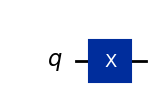

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

$H$ Hadamard Gate: Creates a superposition state. Single-qubit gate.
$$H|0\rangle = \frac{1}{2}\left(|0\rangle+|1\rangle\right),$$
$$H|1\rangle = \frac{1}{2}\left(|0\rangle-|1\rangle\right)$$
$$H=\frac{1}{2}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}$$

A circuit with a Hadamard gate is made as follows:

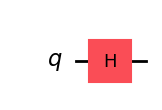

In [3]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

CNOT Controlled-NOT Gate: This gate uses two qubits: a control and a target. Checks the state of a control qubit which is not changed. But if the control qubit is in the state $|1\rangle$, the gate changes the state of the target qubit; if the state of the control qubit is $|0\rangle$ no change is made at all. In the notation below, assume the first qubit is the control, and the second is the target.
$$CNOT|00\rangle = |00\rangle, \\ CNOT|01\rangle = |01\rangle \\ CNOT|10\rangle = |11\rangle \\ CNOT|11\rangle = |10\rangle$$

A CNOT gate looks a bit different in a circuit, since it requires two qubits. This is how it is implemented:

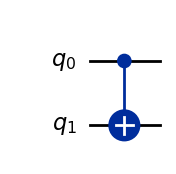

In [4]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw("mpl")

Note that the first qubit listed in `qc.cx(0,1)` is the control, and the second is the target. Diagrammatically, the target is the one with the "+" sign or cross on it.

$R_y(\theta)$ Rotation Y Gate: Rotates the state about the y-axis. This is a single-qubit gate.
$$R_y(\theta)|0\rangle = \cos(\theta/2)|0\rangle+\sin(\theta/2)|1\rangle,\\R_y(\theta)|0\rangle = -\sin(\theta/2)|0\rangle+\cos(\theta/2)|1\rangle$$
$$R_y(\theta)=\begin{bmatrix} \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2) \end{bmatrix}$$

Finally, rotation gates are implemented by specifying the type of gate, the amount of the rotation, and the qubit on which the gate is placed, in that order:

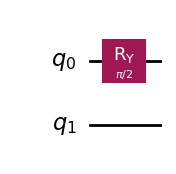

In [16]:
import numpy as np

pi = np.pi

qc = QuantumCircuit(2)
qc.ry(pi / 2, 0)
qc.draw("mpl")

The name of the gate `ry` specifies the axis about which the rotation occurs. The first argument $\pi/2$ refers to the amount of the rotation, and the second argument specifies the qubit on which the gate is to be placed.

### Check-in question

<details>
<summary>Using the syntax introduced or refreshed above, make any quantum circuit involving four different types of quantum gates. </summary>

Answer:

There are, of course, infinitely many possibilities. Here is one example:

`qc=QuantumCircuit(2)`

`qc.ry(pi/2,0)`

`qc.cx(1,0)`

`qc.x(1)`

`qc.h(0)`

`qc.cx(0,1)`

`qc.draw("mpl")`

</details>

## From physical experiment to quantum circuits

From the operations of these gates, we can see, for example, that the kets in the expressions for $P_{++}$:
$$\frac{1}{\sqrt{2}}\left(|+\rangle_L|-\rangle_R-|-\rangle_L|+\rangle_R\right)$$
are likely to involve a Hadamard gate to get the superposition, and a CNOT gate to create the entanglement.

We will now use the H, X, and CNOT gates to turn $|0\rangle_L|0\rangle_R$ into $\frac{1}{\sqrt{2}}\left(|+\rangle_L|-\rangle_R-|-\rangle_L|+\rangle_R\right)$:

$$\frac{1}{\sqrt{2}}\left(|0\rangle_L|1\rangle_R-|1\rangle_L|0\rangle_R\right)$$
$$\frac{1}{\sqrt{2}}CNOT_{LR}\left(|0\rangle_L|1\rangle_R-|1\rangle_L|1\rangle_R\right)$$
Here $CNOT_{LR}$ means a CNOT gate using L as the control and R as the target. We can now factor out the R part of the state:
$$\text{CNOT}_{LR}\frac{1}{\sqrt{2}}\left(|0\rangle_L-|1\rangle_L\right)|1\rangle_R$$
$$\text{CNOT}_{LR} H_L|1\rangle_L|1\rangle_R$$
$$\text{CNOT}_{LR} H_L X_L X_R|0\rangle_L|0\rangle_R$$

Now we have written the ket entirely as quantum gates operating on the default starting state of the qubits.

Now we can use the $R_y(\theta)$ acting on $\vphantom{p}_L\langle 0|_R\langle 1|$ to obtain the bra in the expression for $P_{++}$.

$$\vphantom{p}_L\langle0|_R\left(\cos(\theta/2)\langle0|+\sin(\theta/2)\langle1|\right)$$
$$\vphantom{p}_L\langle0|_R\left(|0\rangle \cos(\theta/2)+|1\rangle \sin(\theta/2)\right)^{\dagger}$$
$$\vphantom{p}_L\langle0|\left(R_{y,R}(\theta)|0\rangle_R\right)^{\dagger}$$
$$\vphantom{p}_L\langle0|_R\langle0|R_{y,R}(-\theta)$$

Combining these results, we can write the probability $P_{++}$ as

$$p_{++}=\left|\vphantom{p}_L\langle0|_R\langle0|R_{y,R}(-\theta)\text{CNOT}_{LR} H_L X_L X_R|0\rangle_L|0\rangle_R\right|^2$$

This gives us explicit instructions for how to construct our quantum circuit. We will apply X, H, CNOT and $R_y$ gates to qubits representing the quantum states of particles measured by Lucas and Rihanna, and make measurements to obtain the probability.

IBM Quantum recommends tackling quantum computing problems using a framework we call Qiskit Patterns. It consists of the following steps.
- Step 1: Map your problem to a quantum circuit
- Step 2: Optimize your circuit for running on real quantum hardware
- Step 3: Execute your job on IBM quantum computers using Runtime Primitives
- Step 4: Post-process the results

Basically all the work we did above was step 1. Let's build the resulting circuit using Qiskit!

### Step 1: Mapping our results to a quantum circuit

In [6]:
# We'll begin by importing qiskit and a visualization module so that we can plot a histogram of our results.

from qiskit.visualization import plot_histogram

Remember that 1/3 of the time Rihanna's axis of choice will be $2\pi/3$ radians from Lucas's, 1/3 of the time it will be $4 \pi/3$ radians from Lucas's, and 1/3 of the time, they will choose the same axis. So we actually need to make 3 quantum circuits for these 3 cases, and add up the results. We'll carefully explain the first one, and the last two we will simply state.

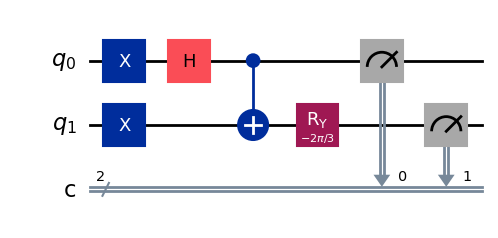

In [17]:
# We start by declaring our first quantum circuit, and giving it two qubits (the first "2") and two classical bits for storing outputs (the second "2")
# Define registers
from qiskit import ClassicalRegister, QuantumRegister

qr = QuantumRegister(2, "q")
cr = ClassicalRegister(2, "c")
qc1 = QuantumCircuit(qr, cr)

# We know from our analysis above that we need an X gate acting on each of the qubits (L and R)
qc1.x([0, 1])
# We need a Hadamard gate acting on Lucas's qubit, which we're calling the 0th qubit.
qc1.h(0)
# The controlled-NOT gate uses the 0th qubit (Lucas's) as the control and the 1st qubit (Rihanna's) as the target.
qc1.cx(0, 1)
# The rotation gate acts on the 1st qubit (Rihanna's) and has an argument of -2 pi/3
qc1.ry(-2 * pi / 3, 1)
# Finally, we want to measure all the qubits in the circuit to obtain measurement probabilities, and store the results in the classical bits.
qc1.measure([0, 1], [0, 1])
# Now we can draw the first of the three circuits that will check Bell's inequality for us.
qc1.draw(output="mpl")

The code below quickly constructs all three circuits in a more streamlined way. Note that the only difference between the three circuits is how far we rotate the two qubits about the $y$ axis.

In [18]:
qcs = [QuantumCircuit(2, 2), QuantumCircuit(2, 2), QuantumCircuit(2, 2)]
for i in range(0, len(qcs)):
    qcs[i].x([0, 1])
    qcs[i].h(0)
    qcs[i].cx(0, 1)

qcs[0].ry(-2 * pi / 3, 1)
qcs[1].ry(-4 * pi / 3, 1)
qcs[2].ry(-2 * pi / 3, 1)
qcs[2].ry(-4 * pi / 3, 1)

for i in range(0, len(qcs)):
    qcs[i].barrier()
    qcs[i].measure([0, 1], [0, 1])

counts_list = [None] * len(qcs)

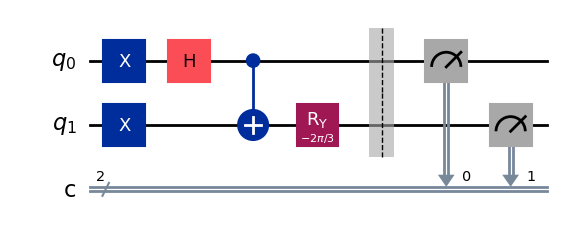

In [19]:
qcs[0].draw(output="mpl")

Now we will use a Qiskit primitive called the StatevectorSampler. A sampler is a primitive designed to sample all the possible states of a system and return probabilities (or in some cases, quasiprobabilities) of obtaining each state. We can specify a number of "shots", and look at the "counts" for each state.

In [20]:
from qiskit.primitives import StatevectorSampler

sampler = StatevectorSampler()

# Start a job that will return shots for all 100 parameter value sets.
for i in range(0, len(qcs)):
    pub = qcs[i]
    job = sampler.run([pub], shots=10000)
    # Extract the result for the 0th pub (this example only has one pub).
    result = job.result()
    data_pub = result[0].data
    counts = data_pub.c.get_counts()
    counts_list[i] = counts
#    plot_histogram(counts)

If we look at the counts from each circuit, we see that two of them were basically identical, and the third was quite different.

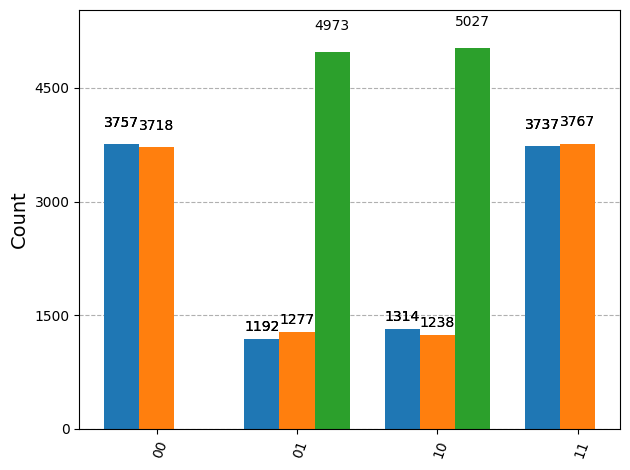

In [21]:
plot_histogram(counts_list)

Let us make a list of the possible outcomes and add up all the counts of each state from each of the three circuits to obtain overall probabilities.

In [22]:
outcomes = ("00", "01", "10", "11")

# Here we convert "None"s into 0's so that we can sum.

for i in range(0, len(qcs)):
    for j in range(0, len(outcomes)):
        if counts_list[i].get(outcomes[j]) is None:
            counts_list[i].update({outcomes[j]: 0})

# Here we create a dictionary that holds all the outcomes and sums over their appearances in each of the circuits.

total_counts = {}
for i in range(0, len(outcomes)):
    total_counts[outcomes[i]] = sum(
        counts_list[j].get(outcomes[i]) for j in range(0, len(qcs))
    )

Now we can print out the total counts for each outcome, and plot the histogram.

{'00': 7475, '01': 7442, '10': 7579, '11': 7504}


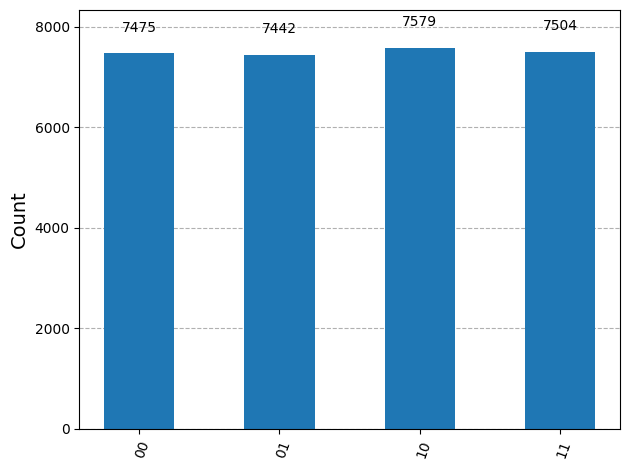

In [23]:
print(total_counts)
plot_histogram(total_counts)

### Check-in question

Is the above picture consistent with the outcomes predicted by hidden variables and determinism? Or is it consistent with probabilistic (and non-local) quantum mechanics?

<details>
<summary>Answer:</summary>

It is consistent with probabilistic and non-local quantum mechanics. The hidden variables treatment predicted that the probability of obtaining the same sign was less than or equal to 4/9. Quantum mechanics predicted a probability of 50%. The histogram above describes a probability of 00 or 11 equal to 49.97%. This is very close to the prediction of probabilistic quantum mechanics, but most importantly, it is greater than the allowed range in the hidden-variables treatment.

</details>

### Check-in question

Does this prove anything about nature?

<details>
<summary>Answer:</summary>

No! We were using a simulator! That is a computer programmed to behave according to the laws of probabilistic quantum mechanics. If we propose a rule, and then program a computer to follow that rule, its ability to follow the rule is not proof that the rule is correct! The only way to prove this is to use a real quantum computer!

</details>

### Step 2: Optimizing your quantum circuit for running on real hardware

Although we initially used a simulator to debug our code, we really want to run on real hardware. After all, a simulator is just pretending to be quantum mechanical, based on the equations above. If the simulator told us those equations were correct, that wouldn't do much to convince us. We want a real quantum computer to tell us what's happening! So we'll select the quantum computer we want to use. Sometimes it might be important to pick a specific device that has properties you want, but often we simply want to use whatever device is least busy.

In [24]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Syntax for first saving your token
# QiskitRuntimeService.save_account(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>", overwrite=True, set_as_default=True)
# service = QiskitRuntimeService(channel='ibm_quantum')

# Load saved credentials
service = QiskitRuntimeService()

backend = service.least_busy(
    operational=True, min_num_qubits=qcs[0].num_qubits, simulator=False
)

/tmp/ipykernel_12418/1695223092.py:8: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud", "ibm_quantum_platform", and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


In [25]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

qcs_isa = qcs

for i in range(0, len(qcs)):
    qcs_isa[i] = pm.run(qcs[i])
    qcs_isa[i].draw(output="mpl", idle_wires=False, style="iqp")

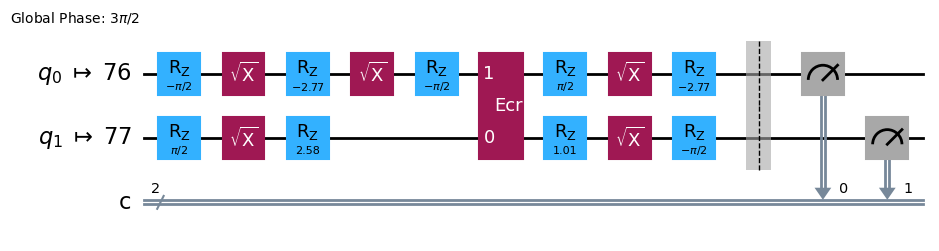

In [26]:
qcs_isa[2].draw(output="mpl", idle_wires=False, style="iqp")

### Step 3: Execute your job on IBM quantum computers using Runtime Primitives

Now that we have optimized our circuits to run on real quantum hardware, and debugged our code using simulators, we are ready to gather statistics from a real quantum computer, and settle the disagreement between Einstein and Born.

In [27]:
from qiskit_ibm_runtime import Session, SamplerV2 as Sampler
# sampler.options.default_shots = 1000

# Start a job that will return shots for all 100 parameter value sets.
result_list = [None] * len(qcs)
real_counts_list = [None] * len(qcs)
with Session(backend=backend) as session:
    sampler = Sampler(mode=session)

    for i in range(0, len(qcs)):
        # Define the primitive unified bloc (pub)
        pub = qcs[i]
        job = sampler.run([pub], shots=10000)
        # Extract the result for the 0th pub (this example only has one pub).
        result_list[i] = job.result()
        data_pub = result_list[i][0].data
        counts = data_pub.c.get_counts()
        real_counts_list[i] = counts
    #   plot_histogram(counts)

/home/porter284/.pyenv/versions/3.11.12/lib/python3.11/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:1111: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)


{'00': 7258, '01': 7574, '10': 7404, '11': 7764}


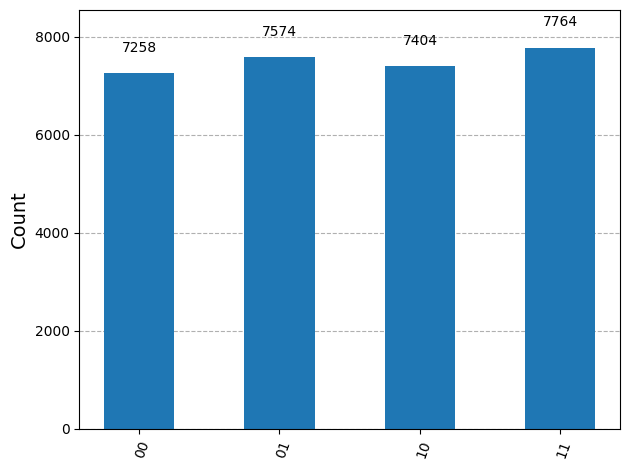

In [28]:
outcomes = ("00", "01", "10", "11")

# Here we convert "None"s into 0's so that we can sum.

for i in range(0, len(qcs)):
    for j in range(0, len(outcomes)):
        if real_counts_list[i].get(outcomes[j]) is None:
            real_counts_list[i].update({outcomes[j]: 0})

# Here we create a dictionary that holds all the outcomes and sums over their appearances in each of the circuits.

real_total_counts = {}
for i in range(0, len(outcomes)):
    real_total_counts[outcomes[i]] = sum(
        real_counts_list[j].get(outcomes[i]) for j in range(0, len(qcs))
    )

print(real_total_counts)
plot_histogram(real_total_counts)

In [40]:
# This syntax allows you to run the job on a simulator, in case you have exhausted your allotted time on real IBM quantum computers.
# But we strongly advise running this on real quantum computers, since this is meant to be a check of the behavior of real quantum systems.

# This uses a local simulator
# from qiskit_aer import AerSimulator

# This generates a simulator that mimics the real quantum system
# backend_sim = AerSimulator.from_backend(backend)

# Import an estimator, this time from qiskit (we import from Runtime for real hardware)
# from qiskit.primitives import BackendSamplerV2
# sampler = BackendSamplerV2(backend = backend_sim)

# result_list = [None] * len(qcs)
# counts_list = [None] * len(qcs)
# for i in range(0, len(qcs)):
# Define the primitive unified bloc (pub)
#    pub = qcs[i]
#    job = sampler.run([pub], shots=10000)
# Extract the result for the 0th pub (this example only has one pub).
#    result_list[i] = job.result()
#    data_pub = result_list[i][0].data
#    counts = data_pub.c.get_counts()
#    counts_list[i] = counts

# data_pubs = (result_list[0][0].data,result_list[1][0].data,result_list[2][0].data)
# outcomes = ("00", "01", "10", "11")

# Here we convert "None"s into 0's so that we can sum.

# for i in range(0, len(qcs)):
#    for j in range(0, len(outcomes)):
#        if counts_list[i].get(outcomes[j]) is None:
#            counts_list[i].update({outcomes[j]: 0})

# Here we create a dictionary that holds all the outcomes and sums over their appearances in each of the circuits.

# total_counts = {}
# for i in range(0, len(outcomes)):
#    total_counts[outcomes[i]] = sum(
#        counts_list[j].get(outcomes[i]) for j in range(0, len(qcs))
#    )

# print(total_counts)
# plot_histogram(total_counts)

In [38]:
counts_list

[None, None, None]

### Step 4: Post-processing and analysis

Let’s take a step back and recap: Using a hidden-variables treatment, and the 3 offset axes, we obtained a constraint on the probability for the measurements to yield the same sign $P_{same,hv} =4/9$. Then we assumed probability distributions as in quantum mechanics and obtained a __different value__ for that probability: $P_{same,gm} = 1/2$. The prediction from quantum mechanics is higher than that allowed by the hidden variables treatment. So it can be experimentally known whether quantum mechanical states are determined by nature prior to measurement, or if they are truly in a probabilistic superposition of possible states.

We engineered our quantum circuits such that there are four possible outcomes corresponding to Lucas and Rihanna measuring one sign of the spin projection or the other: 00, 01, 10, and 11. In the cases of 00 and 11, Lucas and Rihanna measure the same sign, and in the cases of 01 and 10, they measure opposite signs. We see that to a very good approximation, the chance of Lucas and Rihanna getting the same sign are about 50%, definitely greater than $4/9$. This means that there is no set of hidden variables that can account for that distribution of probabilities, and the hidden-variables treatment is not compatible with experiment.

There are different interpretations of quantum mechanical experimental results, and there are many subtleties to experimental setups that are revisited every so often. But so far the principles of quantum mechanics and the probabilistic interpretation of quantum states have accurately described the results. Max Born seems to have been correct.

Let's take just one more moment to reflect on the significance of this. Two particles emerge from a decay event, and the two particles travel in different directions, possibly for a long time. Their spins are not in any well-defined state, and they carry no hidden-variable instructions with them to determine the outcomes of future measurements. But a measurement of one (along, say $+z$) necessarily determines the outcome of an experiment on the other particle's spin along the $z$ direction (it must be $-z$). This means that something about the physics of one particle is determined by what is done to the other particle, possibly far away. This is one situation that has led people to refer to reality as being "non-local".

Two particles like those we've been describing are somehow "connected" in the sense that measurements on one can influence the other. We refer to such particles as being "entangled". Entanglement is more than just correlations. For example, we could construct a classical machine that spits out a magnet to one side with its north end up and a magnet to the other side with its north end down. Such magnets could be perfectly anti-correlated. But a measurement of one would do nothing to the other. In quantum mechanical entanglement, particle A could be in an undefined state (or a mixture of many states), and we can pin it down to a defined state through measurements on a totally different particle (say, B). Nothing like that exists in the classical world.

This often brings up a whole new world of questions and possibilities. Some of the ideas it conjures are real, like using entanglement to compute, as in quantum computers! Some are deceptively appealing, but turn out to fail, like trying to use entanglement to send information faster than light. We encourage you ask all the questions occurring to you, and read about how others have investigated these phenomena. There is a whole world of quantum mechanics out there to explore, but here are just a few resources you might check out:

IBM Quantum courses:
- [Quantum computing in practice](https://learning.quantum.ibm.com/course/quantum-computing-in-practice)
- [Basics of Quantum Information](https://learning.quantum.ibm.com/course/basics-of-quantum-information)

Interesting quantum mechanics papers:
- [Einstein Podolsky and Rosen paradox](https://cds.cern.ch/record/405662/files/PhysRev.47.777.pdf)
- [John Bell's original paper from 1964](https://cds.cern.ch/record/111654/files/vol1p195-200_001.pdf)
- [2019 paper on catching and reversing a "quantum jump" mid-transition](https://www.nature.com/articles/s41586-019-1287-z)

Some quantum mechanics instructional resources:
- [Quantum I course materials](https://www.colorado.edu/sei/departments/physics/activities/courses/quantum-i-course-materials) from the University of Colorado.

Some quantum mechanics educational research:
- [Review of student difficulties in upper-level quantum mechanics](https://journals.aps.org/prper/pdf/10.1103/PhysRevSTPER.11.020117) by C. Singh and E. Marshman

### Critical concepts:

- There was a historical disagreement about whether quantum states were merely unknown or undetermined by nature prior to measurement, whether quantum mechanics is deterministic or probabilistic.
- Hidden variables and therefore local realism are not consistent with observations of quantum mechanics. That is, the correlations observed in quantum mechanics cannot be explained by well-defined variables that are simply unknown to us.
- Quantum mechanics is probabilistic.
- Entanglement is real and observable.
- Entanglement is not just correlations.
- We can map real world scenarios to quantum computers.
- Hidden variables refers to quantities specified by nature, but unknown to humans; they do not exist in this context.

## Questions

### T/F Questions:

1. T/F Albert Einstein argued that quantum mechanics was incomplete, as a theory, because it only described probabilities of outcomes, and not the underlying mechanism that determined those outcomes.
2. T/F "Hidden variables" refers to the idea that two quantum mechanical particles can be entangled.
3. T/F Any two correlated systems are quantum mechanically entangled.
4. T/F Quantum mechanical entanglement is important for getting math right, but you can't see it in an experiment.
5. T/F In most cases, quantum mechanics can't tell you an exact outcome of an experiment, only the probabilities that certain outcomes will be measured.
6. T/F In quantum mechanics, under certain conditions, the state of particle A can be affected by the state of particle B, even if particles A and B are not in contact and do not exchange any particles.
7. T/F We can map real world experiments onto quantum circuits.

### MC Questions:

1. Suppose a spin-0 particle decays into two spin-1/2 particles A and B. A measurement is made on particle A that reveals its spin has a projection along $+z$. Particle B now
    - a. definitely has a spin projection along $-z$
    - b. definitely has a spin projection along $-x$
    - c. definitely has a spin projection along $-y$
    - d. definitely has a negative spin projection along any axis measured.

2. A spin-0 particle decays into two spin-1/2 particles A and B. If particle A is measured to have a projection along $+z$, which of the following projections are possible for a measurement of particle B? Circle all that apply.
    - a. $+x$
    - b. $-x$
    - c. $+y$
    - d. $-y$
    - e. $+z$
    - f. $-z$

3. Suppose a spin-0 particle decays into two spin-1/2 particles A and B. What best describes the state of particle A prior to any measurement.
    - a. The spin of particle A is along $+z$.
    - b. The spin of particle A is along $-z$.
    - c. The spin of particle A is along $+x$.
    - d. The spin of particle A is defined along some directions, but not others.
    - e. The spin orientation of particle A is undetermined by nature prior to any measurements.

4. Which of the following is/are true of the Hadamard gate? Select all that apply.
    - a. $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$
    - b. $H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
    - c. $H \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=|0\rangle$
    - d. $H \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)=|0\rangle$

5. Which of the following is/are true of the X gate? Select all that apply.
    - a. $X|0\rangle = |1\rangle$
    - b. $X|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
    - c. $X|0\rangle = -|0\rangle$
    - d. $X|1\rangle = |0\rangle$
    - e. $X\frac{1}{\sqrt{2}}(|0\rangle-|1\rangle)=X\frac{1}{\sqrt{2}}(|1\rangle-|0\rangle)$

6. Which of the following is a two-qubit gate?
    - a. X
    - b. $R_y(\theta)$
    - c. H
    - d. CNOT

7. Suppose a qubit is in the $|0\rangle$ state. What is the probability of measuring it to be in the $1\rangle$ state?
    - a. Exactly 100% on a noise-free simulator, near 100% on a real quantum computer
    - b. Near 100% on a noise-free simulator, exactly 100% on a real quantum computer
    - c. Exactly 0% on a noise-free simulator, near 0% on a real quantum computer
    - d. Near 0% on a noise-free simulator, exactly 0% on a real quantum computer

### Discussion Questions:

1. Friends A, B, and C are discussing results from this lab, related to Bell's Inequality. Specifically, they are looking at the image that shows the quantum mechanical probability of measuring the same sign along axes is greater than that allowed by a hidden-variables treatment: $(P_\text{same})_\text{max,QM}>(P_\text{same})_\text{max,HV}$. Friend A says, "This means that we didn't know the spin states prior to a measurement." Friend B says, "No, it's more than that. This means the spins are not already pointing in a particular direction, prior to measurement. Although, the spin state might somehow be determined or stored somehow" Friend C says, "No, it's even more than that. This means the future spin state wasn't even decided by nature prior to measurement." With whom do you agree, and why?

2. Explain how quantum mechanical phenomena like entanglement indicate that reality is non-local.

3. What additional experiments would you like to do to convince yourself of the results obtained here?

4. Could Bell's inequality only be explored with 3 equally-spaced axes $a$, $b$, and $c$? Could it be done with any other number of axes? What would this look like? Would it still yield a difference in probabilities predicted by hidden variables vs. probabilistic quantum mechanics?